In [32]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import torchvision, torch

In [3]:
import sys, os
sys.path.insert(0,"../torchxrayvision/")
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F
import glob
import numpy as np
import skimage, skimage.filters
%matplotlib inline
import captum, captum.attr
import torch, torch.nn
import pickle
import attribution
import pandas as pd
import datasets

In [4]:
toplot = glob.glob("/scratch/users/joecohen/output/*all*-*metr*")
toplot

['/scratch/users/joecohen/output/pcrsnanihmimic_chchex-densenet121-all2-metrics.pkl',
 '/scratch/users/joecohen/output/pcrsnamimic_chchex-densenet121-all3-metrics.pkl']

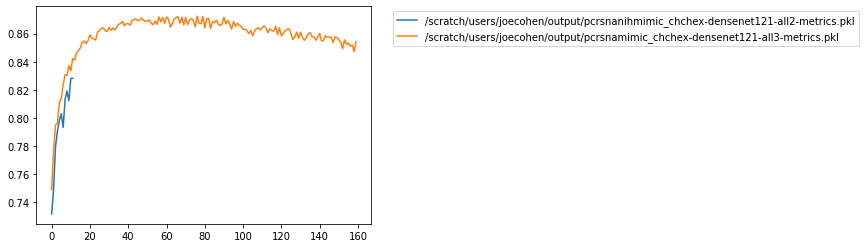

In [5]:
font = {'size'   : 10}
plt.rc('font', **font)

for to in toplot:
    results = pickle.load(open(to,"rb"))
    validauc = [r["validauc"] for r in results]
    plt.plot(validauc, label=to);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [47]:
toplot = glob.glob("/scratch/users/joecohen/output/*res*-*-ae_test*metr*")
toplot

['/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet101-2-ae_test3_elastic-metrics.pkl',
 '/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet151-2-ae_test3-metrics.pkl',
 '/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet101-2-ae_test3-metrics.pkl',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae_test2-metrics.pkl',
 '/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet50-2-ae_test3-metrics.pkl',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet151-2-ae_test2-metrics.pkl',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-4-ae_test2-metrics.pkl']

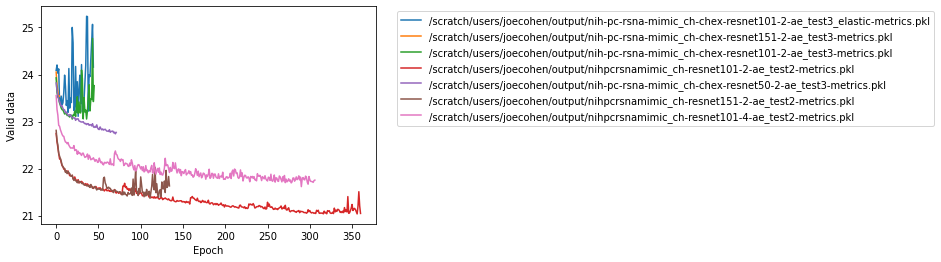

In [48]:
font = {'size'   : 10}
plt.rc('font', **font)

for to in toplot:
    results = pickle.load(open(to,"rb"))
    validauc = [np.log(-r["validauc"]) for r in results]
    plt.plot(validauc, label=to);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.ylabel("Valid data");
plt.xlabel("Epoch");

In [11]:
dmerge = datasets.get_data()

Merge_Dataset num_samples=186433
└ PC_Dataset num_samples=91658 views=['PA']
└ RSNA_Pneumonia_Dataset num_samples=14511 views=['PA'] data_aug=None
└ NIH_Dataset num_samples=67310 views=['PA']
└ SIIM_Pneumothorax_Dataset num_samples=12954



In [68]:
toload = glob.glob("/scratch/users/joecohen/output/*resnet101-2*-ae*test2-e[0-9]*.pt")
toload = sorted(toload)
toload

['/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e1.pt',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e10.pt',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e100.pt',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e101.pt',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e102.pt',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e103.pt',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e104.pt',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e105.pt',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e106.pt',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e107.pt',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e108.pt',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e109.pt',
 '/scratch/users/jo

In [23]:
ae = torch.load(toload[-1], map_location=torch.device('cpu')).cuda()
toload[-1]

'/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae_test2-e250.pt'

In [17]:
model = xrv.models.DenseNet(weights="all").cuda()

In [ ]:
k = pd.DataFrame()
for i in range(50,400, 50):
    ae_file = "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae*test2-e{}.pt".format(i)
    ae_file = glob.glob(ae_file)[0]
    print(ae_file)
    ae = torch.load(ae_file, map_location=torch.device('cpu')).cuda()

    b = attribution.run_eval("Cardiomegaly", dmerge, model, ae)
    a = pd.DataFrame(b).groupby(["target","method"]).mean()
    del a["idx"]
    print(i)
    a["e"] = i
    k = k.append(a)
    print(a)
    

    

/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e50.pt
[0.6158882] -1000 480
[0.6956894] -570 30
[0.5607538] -460 100
[0.51115775] -760 1000
[0.5434719] -1000 890
[0.6650156] -820 270
[0.5021274] -520 1000
[0.54165953] -1000 500
[0.48079076] -40 90
[0.26286346] -60 10
[0.70742023] -1000 360
50
                                   iou       iop       iot   e
target       method                                           
Cardiomegaly latentshift-max  0.250073  0.396381  0.396381  50
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e100.pt
[0.6152642] -1000 680
[0.72219914] -450 70
[0.5663176] -470 80
[0.50888324] -1000 1000
[0.5574839] -1000 870
[0.7032149] -1000 490
[0.31714955] -60 10
[0.53443766] -1000 620
[0.32416376] -50 10
[0.4194636] -40 10
[0.7171446] -980 180
100
                                   iou       iop       iot    e
target       method                                            
Cardiomegaly latentshift-max  0.281333  0.436106  

In [65]:
k

iou       iop       iot   e
target       method                                           
Cardiomegaly latentshift-max  0.246313  0.391310  0.391310  50
             latentshift-max  0.241369  0.385549  0.385549  70
             latentshift-max  0.237849  0.377759  0.377759  90

In [40]:
k

[                                   iou       iop       iot    e
 target       method                                            
 Cardiomegaly latentshift-max  0.195005  0.321157  0.321157  200,
                                    iou       iop       iot    e
 target       method                                            
 Cardiomegaly latentshift-max  0.193917  0.321969  0.321969  220,
                                    iou      iop      iot    e
 target       method                                          
 Cardiomegaly latentshift-max  0.196019  0.32167  0.32167  240,
                                    iou       iop       iot    e
 target       method                                            
 Cardiomegaly latentshift-max  0.168368  0.284424  0.284424  260,
                                    iou       iop       iot    e
 target       method                                            
 Cardiomegaly latentshift-max  0.184183  0.306641  0.306641  280,
                          

In [1]:
# toload = glob.glob("/scratch/users/joecohen/output/*-all3*-best.pt")
# toload = sorted(toload)
# toload

In [2]:
# model = torch.load(toload[-1], map_location=torch.device('cpu')).cuda()
# toload[-1]

In [73]:
# #model.apply_sigmoid = True
# model.pathologies = ['Air Trapping', 'Aortic Atheromatosis', 'Aortic Elongation', 'Atelectasis', 
# 'Bronchiectasis', 'COPD signs', 'Cardiomegaly', 'Consolidation', 'Costophrenic Angle Blunting', 'Edema', 
# 'Effusion', 'Emphysema', 'Enlarged Cardiomediastinum', 'Fibrosis', 'Flattened Diaphragm', 'Fracture', 
# 'Granuloma', 'Hemidiaphragm Elevation', 'Hernia', 'Hilar Enlargement', 'Infiltration', 'Lung Lesion', 
# 'Lung Opacity', 'Mass', 'Nodule', 'Pleural Other', 'Pleural_Thickening', 
# 'Pneumonia', 'Pneumothorax', 'Scoliosis', 'Support Devices', 'Tuberculosis']

In [159]:
model = xrv.models.DenseNet(weights="allv2").cuda()

In [158]:
#https://worksheets.codalab.org/worksheets/0x18d5e5f5df5f404abad9a83f0f1520b5

In [162]:
import baseline_models.cio_mumbai

In [163]:
model = baseline_models.cio_mumbai.AdaptorXRVCIOMumbai()

In [62]:
model.pathologies

['Atelectasis',
 'Consolidation',
 'Infiltration',
 'Pneumothorax',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Effusion',
 'Pneumonia',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Nodule',
 'Mass',
 'Hernia',
 'Lung Lesion',
 'Fracture',
 'Lung Opacity',
 'Enlarged Cardiomediastinum']

In [29]:
dataset

{'Air Trapping': {},
 'Aortic Atheromatosis': {},
 'Aortic Elongation': {},
 'Atelectasis': {0.0: 61582, 1.0: 5728},
 'Bronchiectasis': {},
 'Cardiomegaly': {0.0: 65747, 1.0: 1563},
 'Consolidation': {0.0: 65789, 1.0: 1521},
 'Costophrenic Angle Blunting': {},
 'Edema': {0.0: 67034, 1.0: 276},
 'Effusion': {0.0: 60721, 1.0: 6589},
 'Emphysema': {0.0: 65811, 1.0: 1499},
 'Fibrosis': {0.0: 65902, 1.0: 1408},
 'Flattened Diaphragm': {},
 'Fracture': {},
 'Granuloma': {},
 'Hemidiaphragm Elevation': {},
 'Hernia': {0.0: 67118, 1.0: 192},
 'Hilar Enlargement': {},
 'Infiltration': {0.0: 57957, 1.0: 9353},
 'Lung Opacity': {},
 'Mass': {0.0: 63743, 1.0: 3567},
 'Nodule': {0.0: 63133, 1.0: 4177},
 'Pleural_Thickening': {0.0: 64892, 1.0: 2418},
 'Pneumonia': {0.0: 66680, 1.0: 630},
 'Pneumothorax': {0.0: 63903, 1.0: 3407},
 'Scoliosis': {},
 'Support Devices': {},
 'Tuberculosis': {}}


NIH_Dataset num_samples=67310 views=['PA']

In [30]:
#calc_iou(dimage,sample["pathology_masks"][0][0])

In [31]:
dataset.pathologies

['Air Trapping',
 'Aortic Atheromatosis',
 'Aortic Elongation',
 'Atelectasis',
 'Bronchiectasis',
 'Cardiomegaly',
 'Consolidation',
 'Costophrenic Angle Blunting',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Flattened Diaphragm',
 'Fracture',
 'Granuloma',
 'Hemidiaphragm Elevation',
 'Hernia',
 'Hilar Enlargement',
 'Infiltration',
 'Lung Opacity',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax',
 'Scoliosis',
 'Support Devices',
 'Tuberculosis']

In [8]:
#target = "Lung Opacity"
#target = "Support Devices"
target = "Cardiomegaly"

In [13]:
dwhere = np.where((dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
dwhere[:10]

array([ 27,  43,  59,  77,  79, 146, 156, 157, 162, 163])

In [14]:
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
dwhere[:10]

array([106697, 107149, 107310, 107855, 108087, 108290, 109525, 109899,
       112990, 113159])

In [24]:
b = attribution.run_eval(target, dmerge, model, ae)

[0.62914944] -1000 110
[0.68700707] -490 20
[0.5365102] -880 60
[0.4989696] -70 30
[0.5401202] -1000 190
[0.6726277] -1000 90
[0.13932319] -450 30
[0.5214919] -1000 300
[0.5042797] -1000 320
[0.5021074] -890 480
[0.6807801] -1000 60


In [26]:
print(a)

                                   iou       iop       iot
target       method                                       
Cardiomegaly grad             0.540921  0.699949  0.699949
             guided           0.380774  0.546718  0.546718
             integrated       0.395798  0.556002  0.556002
             latentshift-max  0.192193  0.316775  0.316775


In [25]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                       
Cardiomegaly grad             0.540921  0.699949  0.699949
             guided           0.380774  0.546718  0.546718
             integrated       0.395798  0.556002  0.556002
             latentshift-max  0.192193  0.316775  0.316775

In [161]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                       
Cardiomegaly grad             0.460760  0.622240  0.622240
             guided           0.262233  0.411962  0.411962
             integrated       0.361437  0.520539  0.520539
             latentshift-max  0.156353  0.265526  0.265526

In [158]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                       
Cardiomegaly grad             0.540921  0.699949  0.699949
             guided           0.380774  0.546718  0.546718
             integrated       0.395798  0.556002  0.556002
             latentshift-max  0.192193  0.316775  0.316775

In [138]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                       
Cardiomegaly grad             0.540921  0.699949  0.699949
             guided           0.380774  0.546718  0.546718
             integrated       0.395798  0.556002  0.556002
             latentshift-max  0.231715  0.372131  0.372131

In [110]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                       
Cardiomegaly grad             0.540921  0.699949  0.699949
             guided           0.380774  0.546718  0.546718
             integrated       0.395798  0.556002  0.556002
             latentshift-max  0.196572  0.323127  0.323127

In [68]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                       
Cardiomegaly grad             0.540921  0.699949  0.699949
             guided           0.380774  0.546718  0.546718
             integrated       0.395798  0.556002  0.556002
             latentshift-max  0.148300  0.253821  0.253821

In [31]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target   method                                       
Effusion grad             0.219658  0.338747  0.338747
         guided           0.258823  0.385728  0.385728
         integrated       0.184116  0.287132  0.287132
         latentshift-max  0.203824  0.312150  0.312150

In [38]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target   method                                       
Effusion grad             0.219658  0.338747  0.338747
         guided           0.258823  0.385728  0.385728
         integrated       0.184116  0.287132  0.287132
         latentshift-max  0.250820  0.358866  0.358866

In [76]:
model = xrv.models.DenseNet(weights="allv2").cuda()

In [132]:
b = run_eval("Lung Opacity",10)

[0.772285] -20 10
[0.9072377] -30 20
[0.74046934] -110 10
[0.68100286] -50 10
[0.7334413] -30 10
[0.8163407] -40 20
[0.6796066] -30 10
[0.7440413] -100 10
[0.62104166] -70 10
[0.5753666] -40 10
[0.79815423] -30 10
[0.772285] -20 10
[0.9072377] -30 20
[0.74046934] -110 10
[0.68100286] -50 10
[0.7334413] -30 10
[0.8163407] -40 20
[0.6796066] -30 10
[0.7440413] -100 10
[0.62104166] -70 10
[0.5753666] -40 10
[0.79815423] -30 10
[0.772285] -20 10
[0.9072377] -30 20
[0.74046934] -110 10
[0.68100286] -50 10
[0.7334413] -30 10
[0.8163407] -40 20
[0.6796066] -30 10
[0.7440413] -100 10
[0.62104166] -70 10
[0.5753666] -40 10
[0.79815423] -30 10
[0.772285] -20 10
[0.9072377] -30 20
[0.74046934] -110 10
[0.68100286] -50 10
[0.7334413] -30 10
[0.8163407] -40 20
[0.6796066] -30 10
[0.7440413] -100 10
[0.62104166] -70 10
[0.5753666] -40 10
[0.79815423] -30 10


In [133]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                        
Cardiomegaly grad              0.460760  0.622240  0.622240
             guided            0.262233  0.411962  0.411962
             integrated        0.361437  0.520539  0.520539
             latentshift-int   0.324477  0.480329  0.480329
             latentshift-max   0.320380  0.475418  0.475418
             latentshift-mean  0.319473  0.474475  0.474475
             latentshift-mm    0.319428  0.474358  0.474358

In [242]:
model = xrv.models.DenseNet(weights="all").cuda()

In [184]:
b = run_eval("Edema",10)

In [185]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a

KeyError: 'target'

In [64]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a

iou       iop       iot
target       method                                  
Cardiomegaly grad        0.550350  0.708375  0.708375
             guided      0.315181  0.476381  0.476381
             integrated  0.355179  0.506868  0.506868

In [90]:
model = xrv.models.DenseNet(weights="allv2").cuda()

In [240]:
for_eval = ["Cardiomegaly",
            'Mass',
            'Nodule', 
            "Atelectasis",
            "Lung Opacity",
            "Effusion",
            "Pneumothorax"
            ]

In [228]:
results = []
for target in for_eval:
    print(target)
    results+=run_eval(target,10)

Cardiomegaly
[0.772285] -20 10
[0.9072377] -30 20
[0.74046934] -110 10
[0.68100286] -50 10
[0.7334413] -30 10
[0.8163407] -40 20
[0.6796066] -30 10
[0.7440413] -100 10
[0.62104166] -70 10
[0.5753666] -40 10
[0.79815423] -30 10
Mass
[0.16527706] -30 10
[0.04517366] -100 20
[0.02908395] -430 40
[0.50280213] -230 180
[0.05674741] -30 10
[0.01002804] -330 50
[0.532503] -40 20
[0.50819767] -60 50
[0.13027985] -60 10
[0.11952202] -20 10
[0.03825136] -280 20
Nodule
[0.15930627] -30 10
[0.1484317] -90 10
[0.37210858] -10 10
[0.20620267] -40 10
[0.50059414] -40 70
[0.13509572] -130 10
[0.05809712] -70 10
[0.02544025] -130 30
[0.51568437] -30 40
[0.35067612] -10 10
[0.00547229] -1000 1000
Atelectasis
[0.5198353] -40 20
[0.52380836] -110 70
[0.5448164] -70 20
[0.53913426] -50 30
[0.75484926] -40 10
[0.5888705] -30 10
[0.50976074] -60 50
[0.57936263] -20 10
[0.46676505] -10 10
[0.67122] -50 10
[0.5176419] -30 20
Lung Opacity
[0.0947507] -130 10
[0.19561109] -90 10
[0.16874386] -100 10
[0.16269484]

In [229]:
a = pd.DataFrame(results).groupby(["target","method"]).mean().round(2)
del a["idx"]
a

iou   iop   iot
target       method                           
Atelectasis  grad             0.15  0.22  0.22
             guided           0.12  0.18  0.18
             integrated       0.05  0.08  0.08
             latentshift-max  0.07  0.12  0.12
Cardiomegaly grad             0.46  0.62  0.62
             guided           0.26  0.41  0.41
             integrated       0.36  0.52  0.52
             latentshift-max  0.32  0.48  0.48
Effusion     grad             0.19  0.30  0.30
             guided           0.27  0.40  0.40
             integrated       0.20  0.31  0.31
             latentshift-max  0.29  0.42  0.42
Lung Opacity grad             0.18  0.28  0.28
             guided           0.22  0.32  0.32
             integrated       0.24  0.35  0.35
             latentshift-max  0.21  0.32  0.32
Mass         grad             0.25  0.35  0.35
             guided           0.27  0.39  0.39
             integrated       0.16  0.26  0.26
             latentshift-max  0.21  0.29  0.29
Nodule       grad             0.32  0.42  0.42
             guided           0.27  0.34  0.34
             integrated       0.25  0.32  0.32
             latentshift-max  0.05  0.07  0.07
Pneumothorax grad             0.06  0.09  0.09
             guided           0.10  0.16  0.16
             integrated       0.09  0.15  0.15
             latentshift-max  0.05  0.08  0.08

In [231]:
print(a.to_latex(escape=False))

\begin{tabular}{llrrr}
\toprule
             &                 &   iou &   iop &   iot \\
target & method &       &       &       \\
\midrule
Atelectasis & grad &  0.15 &  0.22 &  0.22 \\
             & guided &  0.12 &  0.18 &  0.18 \\
             & integrated &  0.05 &  0.08 &  0.08 \\
             & latentshift-max &  0.07 &  0.12 &  0.12 \\
Cardiomegaly & grad &  0.46 &  0.62 &  0.62 \\
             & guided &  0.26 &  0.41 &  0.41 \\
             & integrated &  0.36 &  0.52 &  0.52 \\
             & latentshift-max &  0.32 &  0.48 &  0.48 \\
Effusion & grad &  0.19 &  0.30 &  0.30 \\
             & guided &  0.27 &  0.40 &  0.40 \\
             & integrated &  0.20 &  0.31 &  0.31 \\
             & latentshift-max &  0.29 &  0.42 &  0.42 \\
Lung Opacity & grad &  0.18 &  0.28 &  0.28 \\
             & guided &  0.22 &  0.32 &  0.32 \\
             & integrated &  0.24 &  0.35 &  0.35 \\
             & latentshift-max &  0.21 &  0.32 &  0.32 \\
Mass & grad &  0.25 &  0.35 &  0.35

In [28]:
# for p in np.arange(0,1,0.1):
#     for method in ["latentshift-mean","latentshift-max"]:
#         res = []
#         for idx in dwhere[:20]:
#             #print(method, idx)
#             sample = dataset[idx]

#             if dataset.pathologies.index(target) not in sample["pathology_masks"]:
#                 #print("no mask found")
#                 continue
#             image = torch.from_numpy(sample["img"]).unsqueeze(0).cuda()
#             dimage = compute_attribution(image, method, model, target, p=p)
#             iou = calc_iou(dimage,sample["pathology_masks"][dataset.pathologies.index(target)][0])
#             res.append(iou)
#         print(method, str(p) + " mean IoU: {:.2f}±{:.2f}".format(np.mean(res), np.std(res)))

In [32]:
# for method in ["latentshift", "grad", "integrated", "guided"]:
#     res = []
#     for idx in dwhere[:10]:
#         #print(method, idx)
#         sample = dataset[dwhere[idx]]
#         image = torch.from_numpy(sample["img"]).unsqueeze(0)
#         dimage = compute_attribution(image.cuda(), method, model, target)
#         iou = calc_iou(dimage,sample["pathology_masks"][0][0])
#         res.append(iou)
#     print(method, "mean IoU:", np.mean(res))

In [7]:
sample = dmerge[dwhere[5]]
image = torch.from_numpy(sample["img"]).unsqueeze(0).cuda()

NameError: name 'dwhere' is not defined

In [ ]:
p = model(image)[:,model.pathologies.index(target)].detach().cpu()
print(p)
for method in ["grad", "latentshift-max", "guided"]:
    plt.figure(0, figsize=(4, 4), dpi=150)
    dimage = attribution.compute_attribution(image, method, model, target, ae=ae)
    plt.imshow(image.detach().cpu()[0][0], interpolation='none', cmap="gray");
    plt.imshow(dimage, interpolation='none', alpha=0.3);
    plt.imshow(sample["pathology_masks"][dataset.pathologies.index(target)][0], interpolation='none', alpha=0.1);
    plt.title(method)
    plt.show()
    #plt.title("Latent Shift™\nPredicting "+ target);

In [182]:
print(target)
sample = dmerge[dwhere[1]]
image = torch.from_numpy(sample["img"]).unsqueeze(0).cuda()

Cardiomegaly


[0.62914944] -1000 110


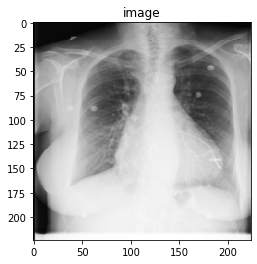

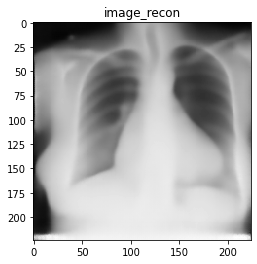

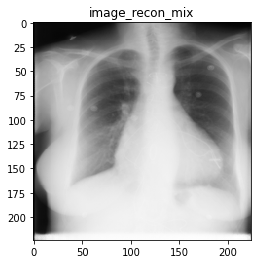

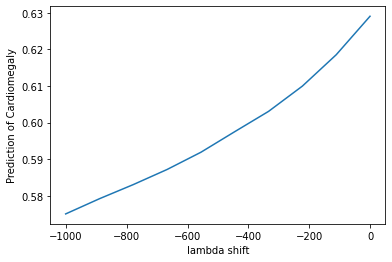

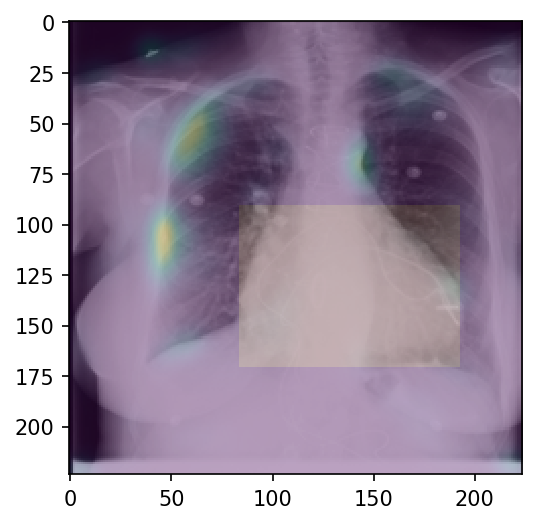

In [193]:
dimage = attribution.compute_attribution(image.cuda(), "latentshift-mean", model, target, plot=True, ae=ae)
plt.figure(0, figsize=(4, 4), dpi=150)
plt.imshow(image.detach().cpu()[0][0], interpolation='none', cmap="gray");
plt.imshow(dimage, interpolation='none', alpha=0.3);
plt.imshow(sample["pathology_masks"][dataset.pathologies.index(target)][0], interpolation='none', alpha=0.1);
#plt.title("Gradient Attribution\nPredicting "+ target);

In [194]:
dimgs = attribution.compute_attribution(image.cuda(), "latentshift", model, target, plot=True, ret_dimgs=True, ae=ae)

[0.62914944] -1000 110


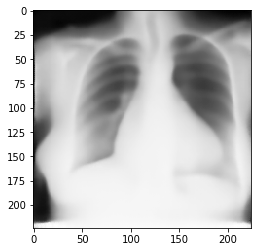

In [195]:
for dimg in dimgs[:1]:
    plt.imshow((dimg[0][0]), interpolation='none', cmap='Greys_r')
    plt.show()

In [196]:
len(dimgs)

10

0
10


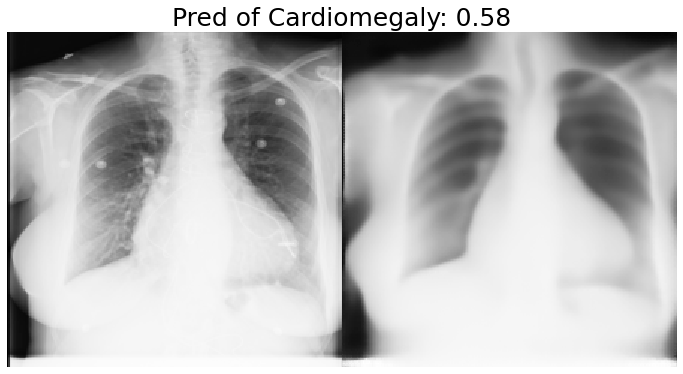

In [197]:
#ffmpeg -i gif-tmp/image-%d-a.png -vcodec libx264 aout.mp4
temp_path = "/lscratch/joecohen/SDS-2342-ASDAA"
!rm -rf $temp_path
towrite = list(dimgs) + list(reversed(dimgs))
img = image[0][0].cpu().numpy()

for idx, dimg in enumerate(towrite):
    if idx % 10 == 0:
        print(idx)
    p = model(torch.from_numpy(dimg).cuda())[0,model.pathologies.index(target)].detach().cpu().numpy()
    name = "a"
    fig = plt.Figure(figsize=(12, 10), dpi=110)
    gcf = plt.gcf()
    gcf.set_size_inches(12, 10)
    fig.set_canvas(gcf.canvas)
    ratio = 0.0
    plt.imshow(np.concatenate([img,img*ratio+dimg[0][0]], 1), interpolation='none', cmap='Greys_r')
    #plt.imshow(img*ratio+dimg[0][0], interpolation='none', cmap='Greys_r')
    plt.title("Pred of {}: {:.2f}".format(target, p),fontsize=25)
    plt.axis('off')
    if not os.path.exists(temp_path): 
        os.mkdir(temp_path)
    for k in range(3):
        i = idx + len(towrite)*k
        fig.savefig(temp_path +'/image-' + str(i) + "-" + name + '.png', bbox_inches='tight', pad_inches=0, transparent=False)

    

In [198]:
!echo $target

Cardiomegaly


In [199]:
!module load ffmpeg;ffmpeg -loglevel quiet -stats -y -i $temp_path/image-%d-a.png "$target-1.mp4"


frame=   60 fps=0.0 q=28.0 Lsize=      42kB time=00:00:02.28 bitrate= 151.8kbits/s speed= 3.1x    


In [200]:
#!module load ffmpeg;ffmpeg -loglevel quiet -stats -y -i aout.mp4 aout.gif


In [201]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2 300

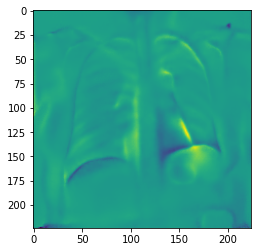

In [56]:
plt.imshow(dimgs[0][0][0] -  dimgs[9][0][0])

In [57]:
from skimage.registration import optical_flow_tvl1, optical_flow_ilk

In [114]:
uu = []
vv = []
for i in range(len(dimgs)-1):
    v, u = optical_flow_ilk(dimgs[i][0][0], dimgs[i+1][0][0])
    uu.append(u)
    vv.append(v)
    

In [115]:
u = np.asarray(uu).mean(0)
v = np.asarray(vv).mean(0)

In [116]:
norm = np.sqrt(u ** 2 + v ** 2)

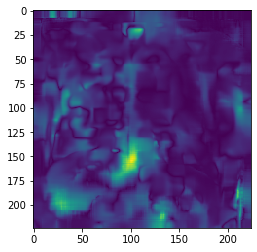

In [117]:
plt.imshow(norm, interpolation='none')

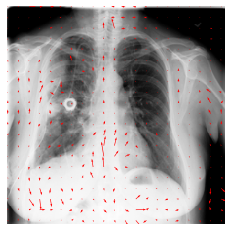

In [118]:
nvec =20  # Number of vectors to be displayed along each image dimension
nl, nc = dimgs[0][0][0].shape
step = max(nl//nvec, nc//nvec)

y, x = np.mgrid[:nl:step, :nc:step]
u_ = u[::step, ::step]
v_ = v[::step, ::step]

plt.imshow(img, interpolation='none', cmap='Greys_r');
plt.quiver(x, y, u_, v_, color='r', units='dots',
           angles='xy', scale_units='xy', lw=3, scale=0.08);
plt.axis('off');

In [40]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2-elas 180 all

In [128]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2 250 allv2

In [277]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2 250 all

In [148]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2 250

In [122]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) 

In [156]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-4-elastic 109

In [139]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2

In [451]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2

In [365]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)#50-2

In [292]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)#101-2

In [281]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)#101-3

In [269]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)#101

In [186]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)

In [146]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)

In [432]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)

In [131]:
from IPython.display import Video
Video("aout2.mp4", embed=True)

In [108]:
from IPython.display import Video
Video("aout2.mp4", embed=True)